## This notebook is just to view the results obtained from "main.py" without running the code in your system. Enjoy gaining insights from it!

# Importing modules

In [1]:
import project1 as p1
import utils
import numpy as np

# Data loading

In [2]:
train_data = utils.load_data('dataset/reviews_train.tsv')
val_data = utils.load_data('dataset/reviews_val.tsv')
test_data = utils.load_data('dataset/reviews_test.tsv')

In [3]:
train_texts, train_labels = zip(*((sample['text'], sample['sentiment']) for sample in train_data))
val_texts, val_labels = zip(*((sample['text'], sample['sentiment']) for sample in val_data))
test_texts, test_labels = zip(*((sample['text'], sample['sentiment']) for sample in test_data))

### Translating Reviews to Feature Vectors

In [4]:
dictionary = p1.bag_of_words(train_texts)

train_bow_features = p1.extract_bow_feature_vectors(train_texts, dictionary)
val_bow_features = p1.extract_bow_feature_vectors(val_texts, dictionary)
test_bow_features = p1.extract_bow_feature_vectors(test_texts, dictionary)

# Qualitative Verification of implementations

#### Using "toy review dataset"

In [5]:
toy_features, toy_labels = toy_data = utils.load_toy_data('dataset/toy_data.tsv')

T = 10
L = 0.2

In [6]:
thetas_perceptron = p1.perceptron(toy_features, toy_labels, T)
thetas_avg_perceptron = p1.average_perceptron(toy_features, toy_labels, T)
thetas_pegasos = p1.pegasos(toy_features, toy_labels, T, L)

In [7]:
def plot_toy_results(algo_name, thetas):
    print('theta for', algo_name, 'is', ', '.join(map(str, list(thetas[0]))))
    print('theta_0 for', algo_name, 'is', str(thetas[1]))
    utils.plot_toy_data(algo_name, toy_features, toy_labels, thetas)

theta for Perceptron is 1.8809999999999982, 3.8159999999999963
theta_0 for Perceptron is -5.0


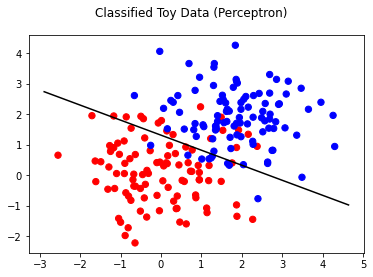

In [8]:
plot_toy_results('Perceptron', thetas_perceptron)

theta for Average Perceptron is 2.425476, 2.6097040000000176
theta_0 for Average Perceptron is -4.732


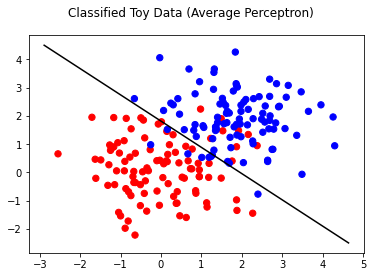

In [9]:
plot_toy_results('Average Perceptron', thetas_avg_perceptron)

theta for Pegasos is 0.6878962360013456, 0.7620653856493942
theta_0 for Pegasos is -1.1216660077128084


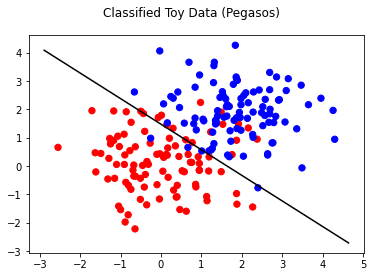

In [10]:
plot_toy_results('Pegasos', thetas_pegasos)

# Implementation

In [11]:
T = 10
L = 0.01

In [12]:
pct_train_accuracy, pct_val_accuracy = \
   p1.classifier_accuracy(p1.perceptron, train_bow_features,
                          val_bow_features, train_labels, val_labels, T=T)
print("{:35} {:.4f}".format("Training accuracy for perceptron:", pct_train_accuracy))
print("{:35} {:.4f}".format("Validation accuracy for perceptron:", pct_val_accuracy))

Training accuracy for perceptron:   0.9293
Validation accuracy for perceptron: 0.7620


In [13]:
avg_pct_train_accuracy, avg_pct_val_accuracy = \
   p1.classifier_accuracy(p1.average_perceptron, train_bow_features,
                          val_bow_features, train_labels, val_labels, T=T)
print("{:43} {:.4f}".format("Training accuracy for average perceptron:", avg_pct_train_accuracy))
print("{:43} {:.4f}".format("Validation accuracy for average perceptron:", avg_pct_val_accuracy))

Training accuracy for average perceptron:   0.9770
Validation accuracy for average perceptron: 0.7960


In [14]:
avg_peg_train_accuracy, avg_peg_val_accuracy = \
   p1.classifier_accuracy(p1.pegasos, train_bow_features,
                          val_bow_features, train_labels, val_labels, T=T, L=L)
print("{:50} {:.4f}".format("Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Validation accuracy for Pegasos:", avg_peg_val_accuracy))

Training accuracy for Pegasos:                     0.9042
Validation accuracy for Pegasos:                   0.7960


# Parameter Tuning

In [15]:
data = (train_bow_features, train_labels, val_bow_features, val_labels)

In [16]:
# values of T and lambda to try
Ts = [1, 5, 10, 15, 25, 50]
Ls = [0.001, 0.01, 0.1, 1, 10]

In [17]:
pct_tune_results = utils.tune_perceptron(Ts, *data)
print('perceptron valid:', list(zip(Ts, pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(pct_tune_results[1]), Ts[np.argmax(pct_tune_results[1])]))

perceptron valid: [(1, 0.75), (5, 0.768), (10, 0.762), (15, 0.772), (25, 0.782), (50, 0.778)]
best = 0.7820, T=25.0000


In [18]:
avg_pct_tune_results = utils.tune_avg_perceptron(Ts, *data)
print('avg perceptron valid:', list(zip(Ts, avg_pct_tune_results[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(avg_pct_tune_results[1]), Ts[np.argmax(avg_pct_tune_results[1])]))

avg perceptron valid: [(1, 0.788), (5, 0.798), (10, 0.796), (15, 0.802), (25, 0.792), (50, 0.784)]
best = 0.8020, T=15.0000


In [19]:
# fix values for L and T while tuning Pegasos T and L, respective
fix_L = 0.01
peg_tune_results_T = utils.tune_pegasos_T(fix_L, Ts, *data)
print('Pegasos valid: tune T', list(zip(Ts, peg_tune_results_T[1])))
print('best = {:.4f}, T={:.4f}'.format(np.max(peg_tune_results_T[1]), Ts[np.argmax(peg_tune_results_T[1])]))

Pegasos valid: tune T [(1, 0.758), (5, 0.794), (10, 0.796), (15, 0.796), (25, 0.802), (50, 0.794)]
best = 0.8020, T=25.0000


In [20]:
fix_T = Ts[np.argmax(peg_tune_results_T[1])]
peg_tune_results_L = utils.tune_pegasos_L(fix_T, Ls, *data)
print('Pegasos valid: tune L', list(zip(Ls, peg_tune_results_L[1])))
print('best = {:.4f}, L={:.4f}'.format(np.max(peg_tune_results_L[1]), Ls[np.argmax(peg_tune_results_L[1])]))

Pegasos valid: tune L [(0.001, 0.788), (0.01, 0.802), (0.1, 0.758), (1, 0.578), (10, 0.518)]
best = 0.8020, L=0.0100


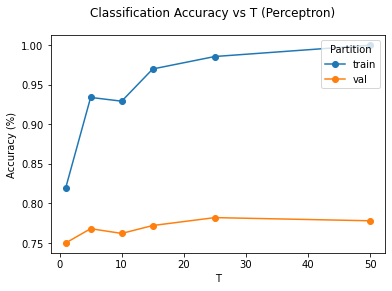

In [21]:
utils.plot_tune_results('Perceptron', 'T', Ts, *pct_tune_results)

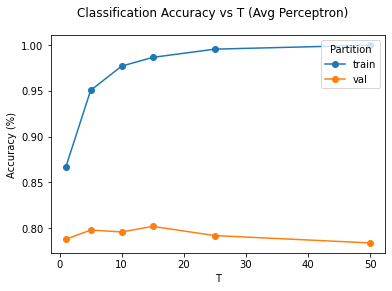

In [22]:
utils.plot_tune_results('Avg Perceptron', 'T', Ts, *avg_pct_tune_results)

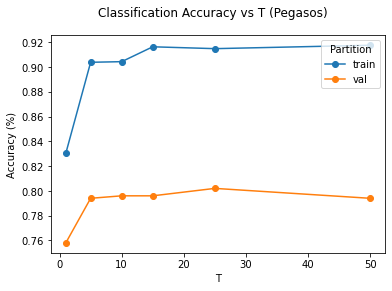

In [23]:
utils.plot_tune_results('Pegasos', 'T', Ts, *peg_tune_results_T)

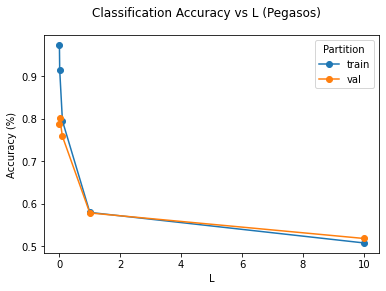

In [24]:
utils.plot_tune_results('Pegasos', 'L', Ls, *peg_tune_results_L)

# Best Testing Accuracy

### Using the best method: Pegasos, along with the optimal hyper-parameters ( T = 25, L = 0.01) according to validation accuracies to test against the test dataset. The test data has been provided as test_bow_features and test_labels.

In [25]:
T = 25
L = 0.01
avg_peg_train_accuracy, avg_peg_test_accuracy = p1.classifier_accuracy(p1.pegasos, train_bow_features,
                                                                       test_bow_features, train_labels,
                                                                       test_labels, T=T, L=L)

In [26]:
print("{:50} {:.4f}".format("Best Training accuracy for Pegasos:", avg_peg_train_accuracy))
print("{:50} {:.4f}".format("Best Testing accuracy for Pegasos:", avg_peg_test_accuracy))

Best Training accuracy for Pegasos:                0.9147
Best Testing accuracy for Pegasos:                 0.8100


# Most Explanatory Word Features

### Assigning to best_theta, the weights (and not the bias!) learned by the Pegasos algorithm with the optimal choice of hyper-parameters (T = 25, L = 0.01).

In [27]:
best_theta = p1.pegasos(train_bow_features, train_labels, T, L)[0]

In [28]:
wordlist = [word for (idx, word) in sorted(zip(dictionary.values(), dictionary.keys()))]
sorted_word_features = utils.most_explanatory_word(best_theta, wordlist)

In [30]:
print("Most Explanatory Word Features")
print(sorted_word_features[:10])

Most Explanatory Word Features
['great', 'delicious', '!', 'best', 'wonderful', 'love', 'perfect', 'loves', 'glad', 'excellent']
